In [262]:
import pandas as pd
import seaborn as sns

In [263]:
raw_df = pd.read_csv('../data/raw/raw_listings.csv')
print(len(raw_df))

121324


In [264]:
raw_df.head()

,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,municipal_eval,price
0,2 storey,1191.3,4076.29,3.0,1.0,2.0,Beauport,202012.0,2004.0,256000.0,332500.0
0,Open area,1261.0,9500.00,2.0,1.0,1.0,Deschambault,202112.0,1957.0,150500.0,265000.0
0,NaN,1645.0,1360.00,3.0,1.0,3.0,Mercier,202111.0,2006.0,479400.0,612000.0
0,Link,2024.0,17000.00,4.0,3.0,1.0,Stoneham,202112.0,2019.0,NaN,526500.0
0,Waterfront,1469.0,16970.00,4.0,2.0,2.0,Trois-Rivières,202111.0,1925.0,NaN,NaN


In [265]:
processed_df = raw_df.copy()

In [266]:
print(len(processed_df))

121324


## Style

In [267]:
processed_df['style'].value_counts(dropna=False).iloc[0:10]

NaN                 25934
2 storey            23973
Open area           18655
Detached            13612
Waterfront           4031
Side split           3361
Semi-detached        3237
Rural                3134
New construction     2671
Link                 2480
Name: style, dtype: int64

In [268]:
processed_df['style'] = processed_df['style'].fillna('Unknown')
styles = processed_df['style'].value_counts()
processed_df = processed_df[processed_df['style'].isin(styles.keys())]

In [269]:
print(len(processed_df))

121324


## Living Area

In [270]:
processed_df['living_area'].value_counts(dropna=False).iloc[0:5]

960.0     3436
1800.0    3014
1200.0    2666
1560.0    2379
NaN       2286
Name: living_area, dtype: int64

In [271]:
mean_living_area = processed_df['living_area'].dropna().mean()
processed_df['living_area'] = processed_df['living_area'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='living_area', ylabel='Density'>

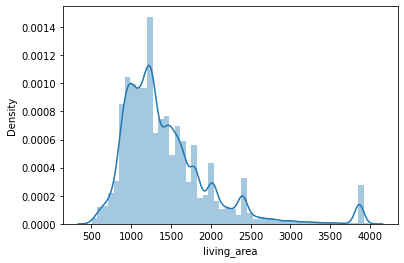

In [272]:
processed_df = processed_df[processed_df['living_area'] > 500]
processed_df = processed_df[processed_df['living_area'] < 4000]
processed_df['living_area'] = processed_df['living_area'].astype(int)

sns.distplot(processed_df['living_area'])

In [273]:
print(len(processed_df))

120504


## Lot Dimensions

In [274]:
processed_df['lot_dimensions'].value_counts(dropna=False).iloc[0:5]

NaN        2636
6000.0     2289
17000.0    2110
9500.0     2098
10100.0    2037
Name: lot_dimensions, dtype: int64

In [275]:
mean_lot_dimensions = processed_df['lot_dimensions'].dropna().mean()
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lot_dimensions', ylabel='Density'>

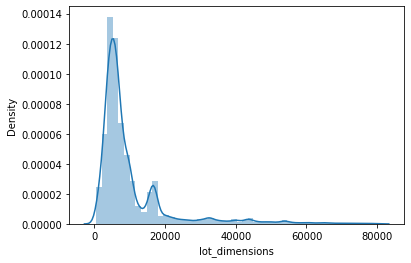

In [276]:
processed_df = processed_df[processed_df['lot_dimensions'] > 500]
processed_df = processed_df[processed_df['lot_dimensions'] < 80000]
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].astype(int)

sns.distplot(processed_df['lot_dimensions'])

In [277]:
print(len(processed_df))

117308


## Bedrooms, Bathrooms & Levels

In [278]:
processed_df['bedrooms'].value_counts(dropna=False)

3.0     49242
4.0     39706
2.0     14242
5.0     11826
6.0      1160
1.0       531
NaN       292
7.0       196
8.0        67
9.0        18
10.0       12
11.0        6
15.0        2
3.5         2
13.0        1
17.0        1
2.5         1
3.2         1
4.5         1
2.1         1
Name: bedrooms, dtype: int64

In [279]:
processed_df['bathrooms'].value_counts(dropna=False)

2.0       59387
1.0       52224
3.0        5279
NaN         205
4.0         172
5.0          27
6.0           7
7.0           2
8.0           2
11.0          1
10.0          1
2008.0        1
Name: bathrooms, dtype: int64

In [280]:
processed_df['levels'].value_counts(dropna=False)

2.0       55642
1.0       55375
3.0        3956
NaN        2201
4.0         124
5.0           6
11.0          1
6.0           1
1816.0        1
768.0         1
Name: levels, dtype: int64

In [281]:
processed_df = processed_df[processed_df['bedrooms'] < 7]
processed_df = processed_df[processed_df['bathrooms'] < 5]
processed_df = processed_df[processed_df['levels'] < 4]

processed_df['bedrooms'] = processed_df['bedrooms'].astype(int)
processed_df['bathrooms'] = processed_df['bathrooms'].astype(int)
processed_df['levels'] = processed_df['levels'].astype(int)

In [282]:
print(len(processed_df))

114386


## Listing Date

In [283]:
processed_df['listing_date'].value_counts(dropna=False).iloc[0:5]

202112.0    12187
202111.0     6321
201907.0     3978
202012.0     2673
202109.0     2485
Name: listing_date, dtype: int64

In [284]:
processed_df['listing_date'] = pd.to_datetime(processed_df['listing_date'], format='%Y%m')

## Year of Construction

In [285]:
processed_df['year_of_construction'].value_counts(dropna=False).iloc[0:5]

NaN       11398
2004.0     4378
2006.0     4333
1989.0     3614
1975.0     3260
Name: year_of_construction, dtype: int64

In [286]:
mean_year_of_constructions = processed_df['year_of_construction'].dropna().mean()
processed_df['year_of_construction'] = processed_df['year_of_construction'].fillna(mean_living_area)

In [287]:
years = processed_df['year_of_construction'].value_counts()
processed_df = processed_df[processed_df['year_of_construction'].isin(years.keys())]
processed_df['year_of_construction'] = processed_df['year_of_construction'].astype(int)

In [288]:
print(len(processed_df))

114386


## Municipal Evaluation

In [289]:
processed_df['municipal_eval'].value_counts(dropna=False).iloc[0:5]

NaN         57873
256000.0     2084
150500.0     2043
209200.0     2036
251100.0     2034
Name: municipal_eval, dtype: int64

In [290]:
drop_municipal_eval = True

In [291]:
if drop_municipal_eval:
    processed_df = processed_df.drop(['municipal_eval'], axis=1)
else:
    processed_df = processed_df[processed_df['municipal_eval'] > 2000]
    processed_df = processed_df[processed_df['municipal_eval'] < 1000000]
    processed_df['municipal_eval'] = processed_df['municipal_eval'].astype(int)

    sns.distplot(processed_df['municipal_eval'])

## Price

In [292]:
processed_df['price'].value_counts(dropna=False).iloc[0:5]

NaN         22610
265000.0     2686
360000.0     2413
400000.0     2384
550000.0     2153
Name: price, dtype: int64

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

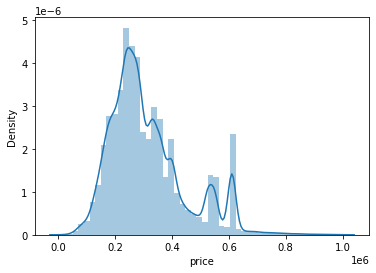

In [293]:
processed_df = processed_df[processed_df['price'] > 2000]
processed_df = processed_df[processed_df['price'] < 1000000]
processed_df['price'] = processed_df['price'].astype(int)

sns.distplot(processed_df['price'])

In [294]:
processed_df.head()

,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,price
0,2 storey,1191,4076,3,1,2,Beauport,2020-12-01,2004,332500
0,Open area,1261,9500,2,1,1,Deschambault,2021-12-01,1957,265000
0,Unknown,1645,1360,3,1,3,Mercier,2021-11-01,2006,612000
0,Link,2024,17000,4,3,1,Stoneham,2021-12-01,2019,526500
0,2 storey,2400,4471,4,2,2,Gatineau,2021-12-01,1989,360000


## Location

In [295]:
processed_df['location'].value_counts(dropna=False).iloc[50:70]

Cap-Rouge               355
Mont-St-Hilaire         343
L'Ancienne-Lorette      342
Vaudreuil-Dorion        337
St-Constant             336
Lebourgneuf             333
Candiac                 330
Chateauguay             324
Pointe-Aux-Trembles     320
Boisbriand              307
Sorel-Tracy             305
St-Étienne-De-Lauzon    291
St-Basile-Le-Grand      275
Bromont                 270
St-Colomban             268
Ste-Marie               263
Ste-Catherine           262
Deux-Montagnes          260
Marieville              259
St-Rédempteur           258
Name: location, dtype: int64

In [296]:
locations = processed_df['location'].value_counts()
processed_df = processed_df[processed_df['location'].isin(locations.keys()[0:50])]

In [297]:
print(len(raw_df))
print(len(processed_df))

121324
59875


In [298]:
processed_df.to_csv('../data/processed/processed_listings.csv', index=False)